<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [63]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [64]:
data = pd.read_csv('DMV_Written_Tests.csv')
X = data[['DMV_Test_1', 'DMV_Test_2']].values
y = data['Results'].values

print("First 5 rows of data:")
print(data.head())

First 5 rows of data:
   DMV_Test_1  DMV_Test_2  Results
0   34.623660   78.024693        0
1   30.286711   43.894998        0
2   35.847409   72.902198        0
3   60.182599   86.308552        1
4   79.032736   75.344376        1


### Task 3: Visualize the Data
---

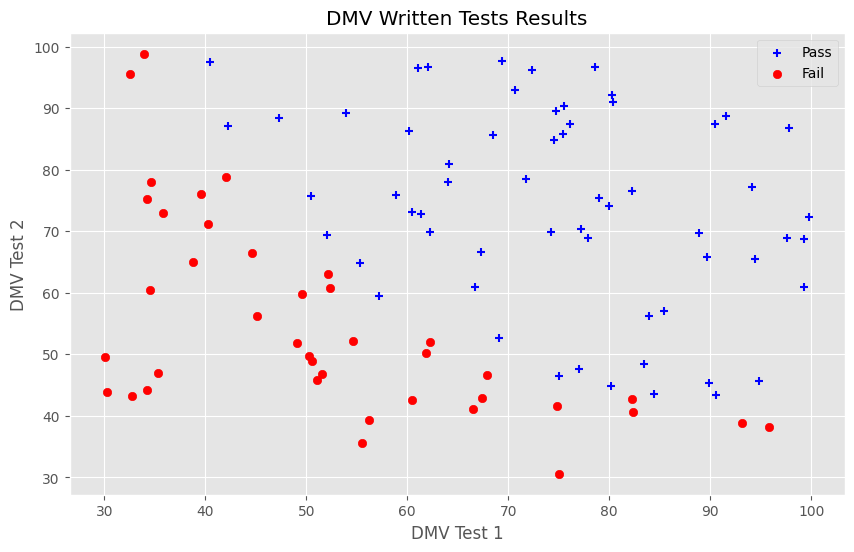

In [65]:
def plot_data(X, y):
    pos = y == 1
    neg = y == 0

    plt.figure(figsize=(10, 6))
    plt.scatter(X[pos, 0], X[pos, 1], color='b', marker='+', label='Pass')
    plt.scatter(X[neg, 0], X[neg, 1], color='r', marker='o', label='Fail')
    plt.xlabel('DMV Test 1')
    plt.ylabel('DMV Test 2')
    plt.legend()
    plt.title('DMV Written Tests Results')
    plt.show()

plot_data(X, y)

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [66]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [67]:
print(sigmoid(0))
print(sigmoid(1))
print(sigmoid(-1))

0.5
0.7310585786300049
0.2689414213699951


### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [68]:
def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def compute_gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    gradient = (1/m) * X.T.dot(h - y)
    return gradient
m = len(y)
X_with_intercept = np.hstack((np.ones((m, 1)), X))

initial_theta = np.zeros(X_with_intercept.shape[1])

### Task 6: Cost and Gradient at Initialization
---

In [69]:
cost_at_init = compute_cost(initial_theta, X_with_intercept, y)
grad_at_init = compute_gradient(initial_theta, X_with_intercept, y)
print('Cost at initial theta (zeros):', cost_at_init)
print('Gradient at initial theta (zeros):', grad_at_init)

Cost at initial theta (zeros): 0.6931471805599453
Gradient at initial theta (zeros): [ -0.1        -12.00921659 -11.26284221]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

Optimized theta: [-4.81180027  0.04528064  0.03819149]


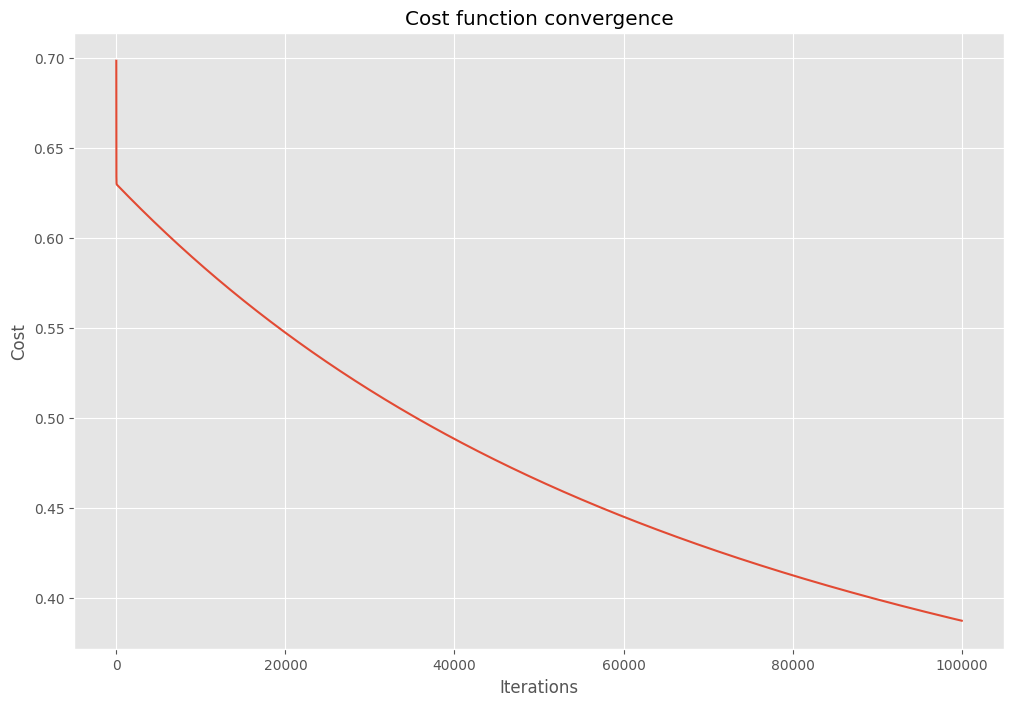

In [70]:
def gradient_descent(X, y, theta, alpha, num_iters):
    J_history = []

    for i in range(num_iters):
        gradient = compute_gradient(theta, X, y)
        theta -= alpha * gradient
        cost = compute_cost(theta, X, y)
        J_history.append(cost)

    return theta, J_history

alpha = 0.001
num_iters = 100000
theta_optimized, J_history = gradient_descent(X_with_intercept, y, initial_theta, alpha, num_iters)

print('Optimized theta:', theta_optimized)


plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function convergence')
plt.show()





### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

In [71]:
def predict(theta, X):
    prob = sigmoid(X.dot(theta))
    return [1 if p >= 0.5 else 0 for p in prob]

predictions = predict(theta_optimized, X_with_intercept)
accuracy = np.mean(predictions == y) * 100
print('Training Accuracy: {:.2f}%'.format(accuracy))

Training Accuracy: 91.00%


### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

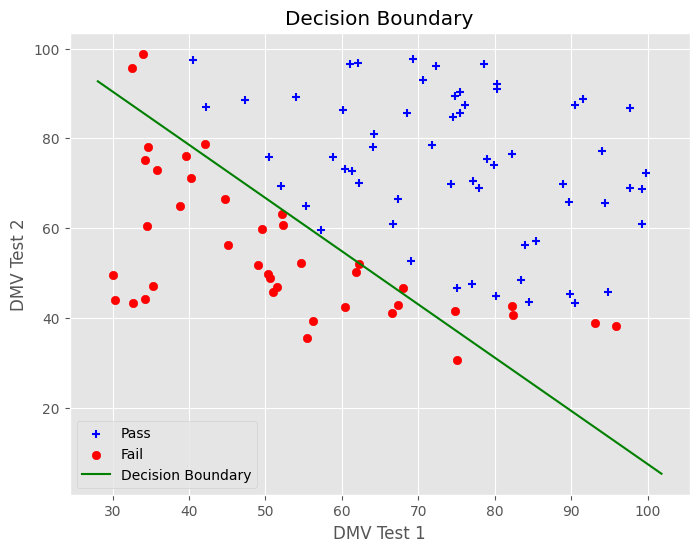

In [72]:
def plot_decision_boundary(theta, X, y):
    plt.figure(figsize=(8,6))
    pos = y == 1
    neg = y == 0
    plt.scatter(X[pos, 1], X[pos, 2], color='b', marker='+', label='Pass')
    plt.scatter(X[neg, 1], X[neg, 2], color='r', marker='o', label='Fail')

    x_values = [np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2]
    y_values = -(theta[0] + theta[1]*np.array(x_values)) / theta[2]

    plt.plot(x_values, y_values, label='Decision Boundary', color='green')
    plt.xlabel('DMV Test 1')
    plt.ylabel('DMV Test 2')
    plt.legend()
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(theta_optimized, X_with_intercept, y)

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

Training Accuracy (Scikit-Learn): 89.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



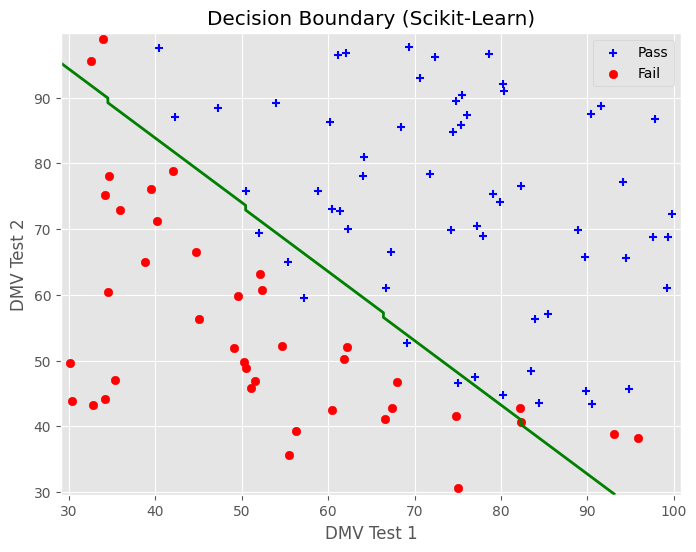

In [73]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X, y)


y_pred = model.predict(X)


accuracy_sklearn = accuracy_score(y, y_pred) * 100
print('Training Accuracy (Scikit-Learn): {:.2f}%'.format(accuracy_sklearn))


print("\nClassification Report:")
print(classification_report(y, y_pred))


def plot_decision_boundary_sklearn(model, X, y):
    plt.figure(figsize=(8,6))
    pos = y == 1
    neg = y == 0
    plt.scatter(X[pos, 0], X[pos, 1], color='b', marker='+', label='Pass')
    plt.scatter(X[neg, 0], X[neg, 1], color='r', marker='o', label='Fail')


    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='green')
    plt.xlabel('DMV Test 1')
    plt.ylabel('DMV Test 2')
    plt.legend()
    plt.title('Decision Boundary (Scikit-Learn)')
    plt.show()

plot_decision_boundary_sklearn(model, X, y)
